## DBSCAN AND HIERARCHICAL CLUSTERING

In [1]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

#####  DATA INTERPRETATION AND PREPROCESSING 

In [2]:
#LOADING DATASET
df=pd.read_csv('Car_sales.csv')
print(df.shape)
df.head(2)

(157, 16)


,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.5,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.4,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778


In [3]:
#getting information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

In [4]:
#removing null values
df=df.dropna()
#checking for null values
df.isnull().sum()

Manufacturer           0
Model                  0
Sales_in_thousands     0
__year_resale_value    0
Vehicle_type           0
Price_in_thousands     0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Latest_Launch          0
Power_perf_factor      0
dtype: int64

In [5]:
df.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', '__year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

In [6]:
#SCALING THE DATASET
from sklearn.preprocessing import StandardScaler
min_max_scaler = StandardScaler()

In [7]:
columns=['Sales_in_thousands', '__year_resale_value','Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency','Power_perf_factor']
df_scaled=df.copy()
df_scaled[columns]=min_max_scaler.fit_transform(df[columns])

In [8]:
#DATASET AFTER SCALING
df_scaled

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,-0.564554,-0.144648,Passenger,-0.317230,-1.188519,-0.707601,-0.764273,-1.106603,-1.110752,-1.152084,-1.220853,0.884790,2/2/2012,-0.648864
1,Acura,TL,-0.263968,0.159525,Passenger,0.172510,0.143989,0.749354,0.096494,-0.253125,0.375767,0.324491,-0.162192,0.200734,6/3/2011,0.640645
3,Acura,RL,-0.676024,1.011901,Passenger,1.137795,0.429526,0.492244,0.907361,0.059816,0.644065,0.884513,0.049540,-0.483322,3/10/2011,0.641385
4,Audi,A4,-0.518017,0.365480,Passenger,-0.140498,-1.188519,-0.536195,-0.589625,-0.850559,-0.704679,-0.548336,-0.373924,0.656772,10/8/2011,-0.473601
5,Audi,A6,-0.539653,0.477976,Passenger,0.566432,-0.236728,0.320838,0.171343,1.396931,0.310505,0.398488,0.181873,-0.483322,8/9/2011,0.375435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Volkswagen,Golf,-0.660329,-0.571701,Passenger,-0.785677,-0.998161,-1.136117,-1.051195,-0.822110,-1.770621,-0.936820,-0.876788,0.428753,1/24/2011,-1.090627
146,Volkswagen,Jetta,0.329268,-0.414639,Passenger,-0.657919,-0.998161,-1.136117,-1.051195,-0.822110,-1.118003,-0.792190,-0.876788,0.428753,8/27/2011,-1.063569
147,Volkswagen,Passat,-0.107179,-0.113062,Passenger,-0.338523,-1.188519,-0.536195,-0.115579,-0.765212,-0.262349,-0.472658,-0.373924,0.656772,10/30/2012,-0.515542
148,Volkswagen,Cabrio,-0.662898,-0.126043,Passenger,-0.424405,-0.998161,-1.136117,-1.238318,-1.277298,-1.980909,-0.412115,-1.088521,0.428753,5/31/2011,-1.014112


In [35]:
df=df_scaled[['Length','Width']]

##### TASK 1

##### DBSCAN

In [10]:
from sklearn.cluster import DBSCAN

EPSILON= 0.9 MIN_SAMPLES= 3
OUTLIERS: 6


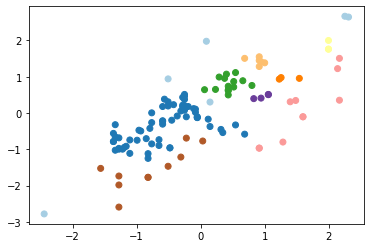

EPSILON= 0.9 MIN_SAMPLES= 4
OUTLIERS: 13


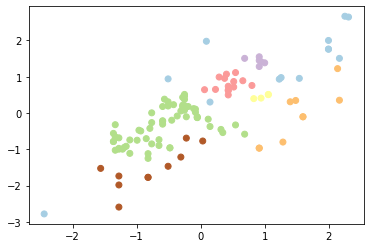

EPSILON= 0.9 MIN_SAMPLES= 5
OUTLIERS: 10


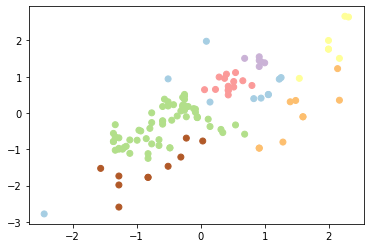

EPSILON= 1 MIN_SAMPLES= 3
OUTLIERS: 2


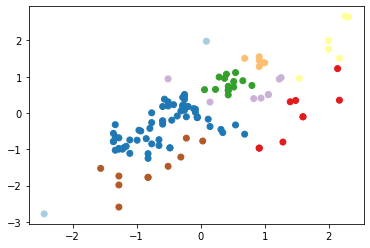

EPSILON= 1 MIN_SAMPLES= 4
OUTLIERS: 2


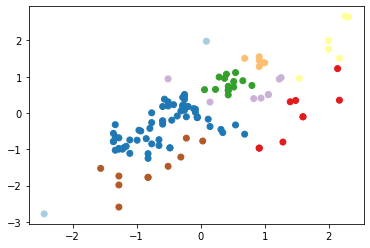

EPSILON= 1 MIN_SAMPLES= 5
OUTLIERS: 2


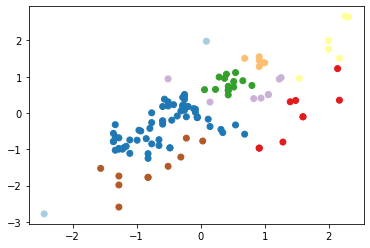

EPSILON= 1.1 MIN_SAMPLES= 3
OUTLIERS: 2


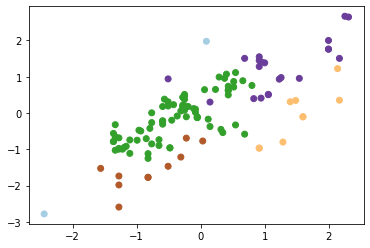

EPSILON= 1.1 MIN_SAMPLES= 4
OUTLIERS: 2


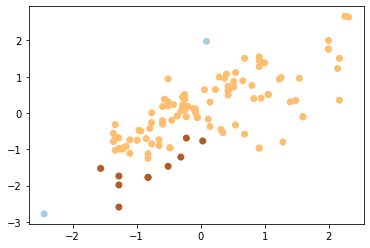

EPSILON= 1.1 MIN_SAMPLES= 5
OUTLIERS: 2


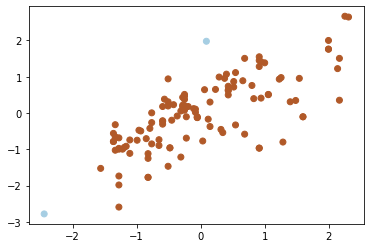

EPSILON= 1.2 MIN_SAMPLES= 3
OUTLIERS: 2


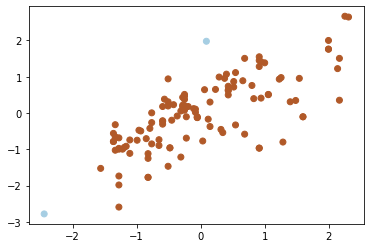

EPSILON= 1.2 MIN_SAMPLES= 4
OUTLIERS: 2


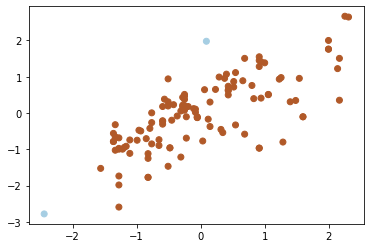

EPSILON= 1.2 MIN_SAMPLES= 5
OUTLIERS: 2


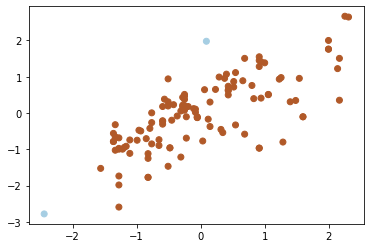

EPSILON= 1.3 MIN_SAMPLES= 3
OUTLIERS: 1


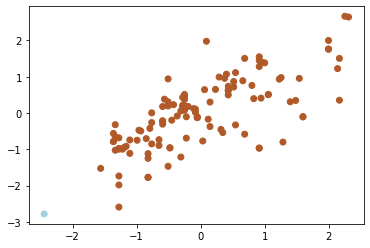

EPSILON= 1.3 MIN_SAMPLES= 4
OUTLIERS: 1


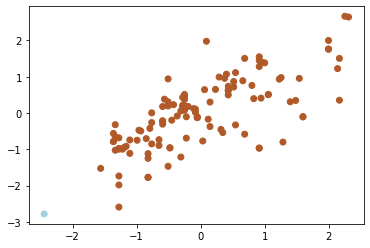

EPSILON= 1.3 MIN_SAMPLES= 5
OUTLIERS: 1


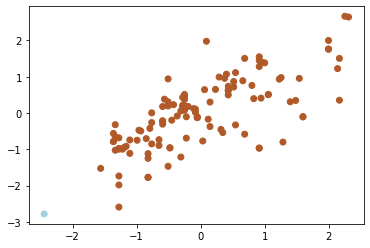

In [30]:
eps=[0.9,1,1.1,1.2,1.3]
min_samples=[3,4,5]
for i in eps:
    for j in min_samples:
        dbscan = DBSCAN(eps=i, min_samples=j)
        df['clusterid'] = dbscan.fit_predict(df)
        print('EPSILON=',i,'MIN_SAMPLES=',j)
        y_pred=df['clusterid']
        O=np.sum(df['clusterid']==-1)
        print('OUTLIERS:',O)
        plt.scatter(df['Width'],df['Length'], c= y_pred,cmap='Paired')
        plt.show()

In [31]:
df[df.clusterid==0].describe()

,Length,Width,clusterid
count,116.000000,116.000000,116.0
mean,0.023953,0.021067,0.0
std,0.974515,0.982352,0.0
min,-2.590019,-1.561790,0.0
25%,-0.735497,-0.765212,0.0
50%,0.013201,-0.210451,0.0
75%,0.638627,0.685700,0.0
max,2.667181,2.307307,0.0


In [32]:
df[df.clusterid==-1].describe()

,Length,Width,clusterid
count,1.000000,1.000000,1.0
mean,-2.778553,-2.443717,-1.0
std,NaN,NaN,NaN
min,-2.778553,-2.443717,-1.0
25%,-2.778553,-2.443717,-1.0
50%,-2.778553,-2.443717,-1.0
75%,-2.778553,-2.443717,-1.0
max,-2.778553,-2.443717,-1.0


##### TASK 3

#### Hierarchical clustering

In [40]:
from sklearn.cluster import  AgglomerativeClustering

n_clusters: 2 Linkage: complete


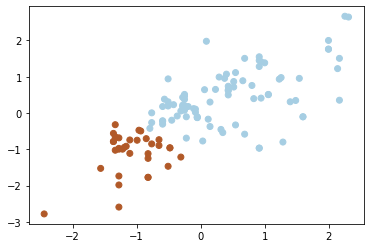

n_clusters: 3 Linkage: complete


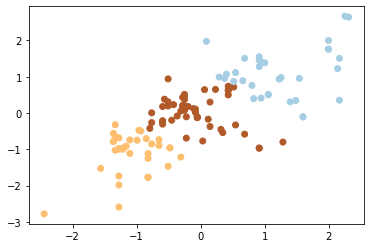

n_clusters: 4 Linkage: complete


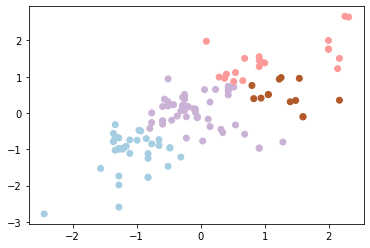

n_clusters: 5 Linkage: complete


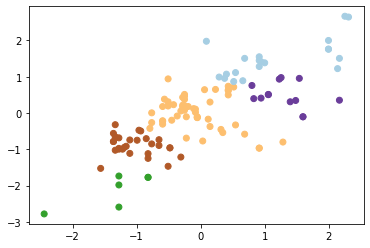

n_clusters: 6 Linkage: complete


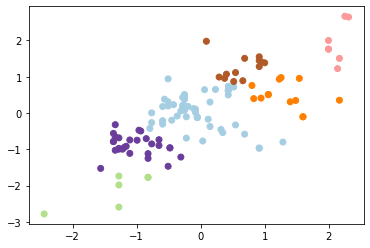

n_clusters: 2 Linkage: average


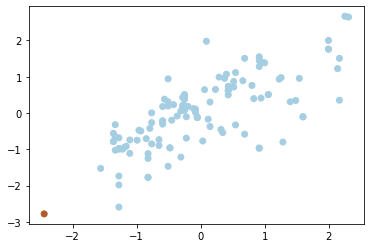

n_clusters: 3 Linkage: average


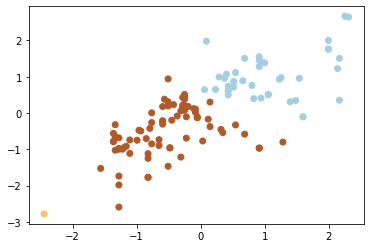

n_clusters: 4 Linkage: average


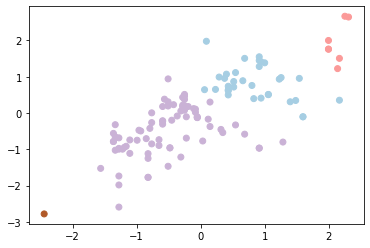

n_clusters: 5 Linkage: average


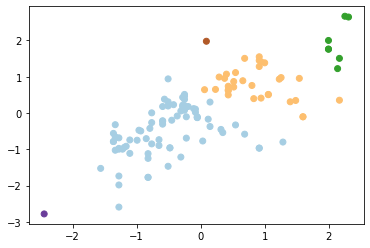

n_clusters: 6 Linkage: average


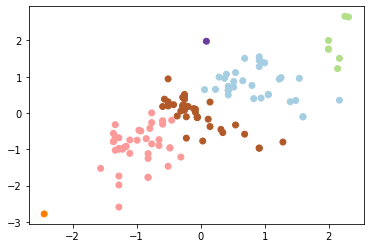

n_clusters: 2 Linkage: single


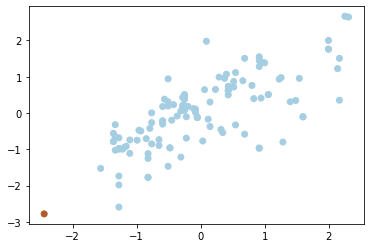

n_clusters: 3 Linkage: single


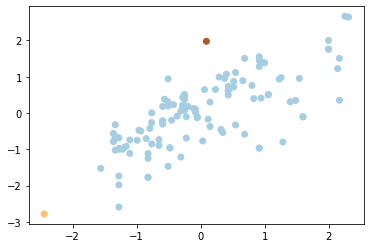

n_clusters: 4 Linkage: single


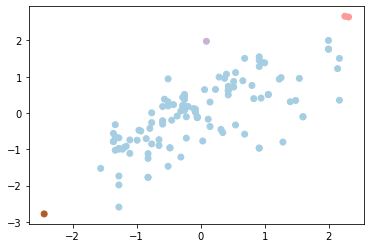

n_clusters: 5 Linkage: single


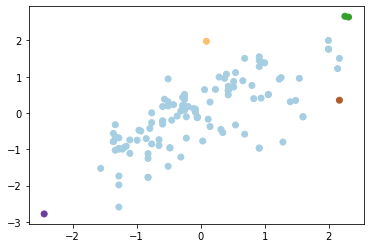

n_clusters: 6 Linkage: single


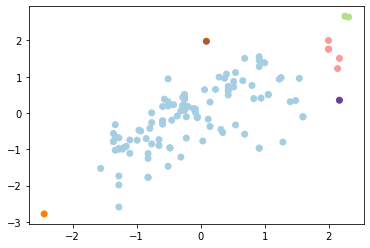

n_clusters: 2 Linkage: ward


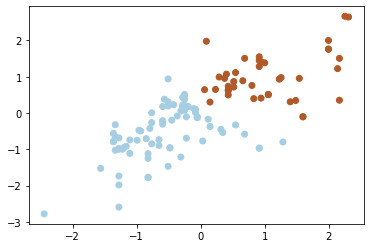

n_clusters: 3 Linkage: ward


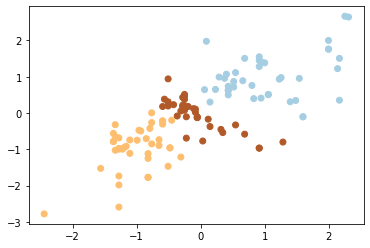

n_clusters: 4 Linkage: ward


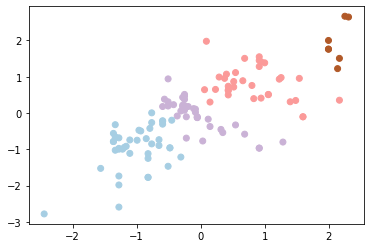

n_clusters: 5 Linkage: ward


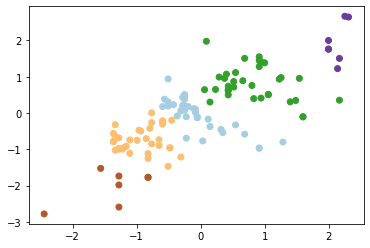

n_clusters: 6 Linkage: ward


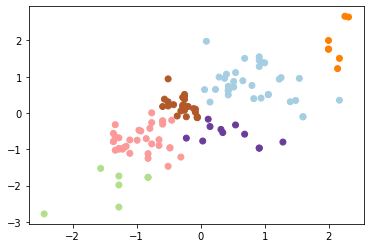

In [44]:
Cluster=[2,3,4,5,6]
Linkage=['complete','average','single','ward']
for i in Linkage:
    for j in Cluster:
        model = AgglomerativeClustering(n_clusters=j, linkage =i)
        model = model.fit_predict(df)
        print('n_clusters:',j,'Linkage:',i)
        plt.scatter(df['Width'],df['Length'], c= model,cmap='Paired')
        plt.show()

n_cluster=4,5

linkage=complete,ward

##### TASK 4

In [17]:
import scipy.cluster.hierarchy as shc

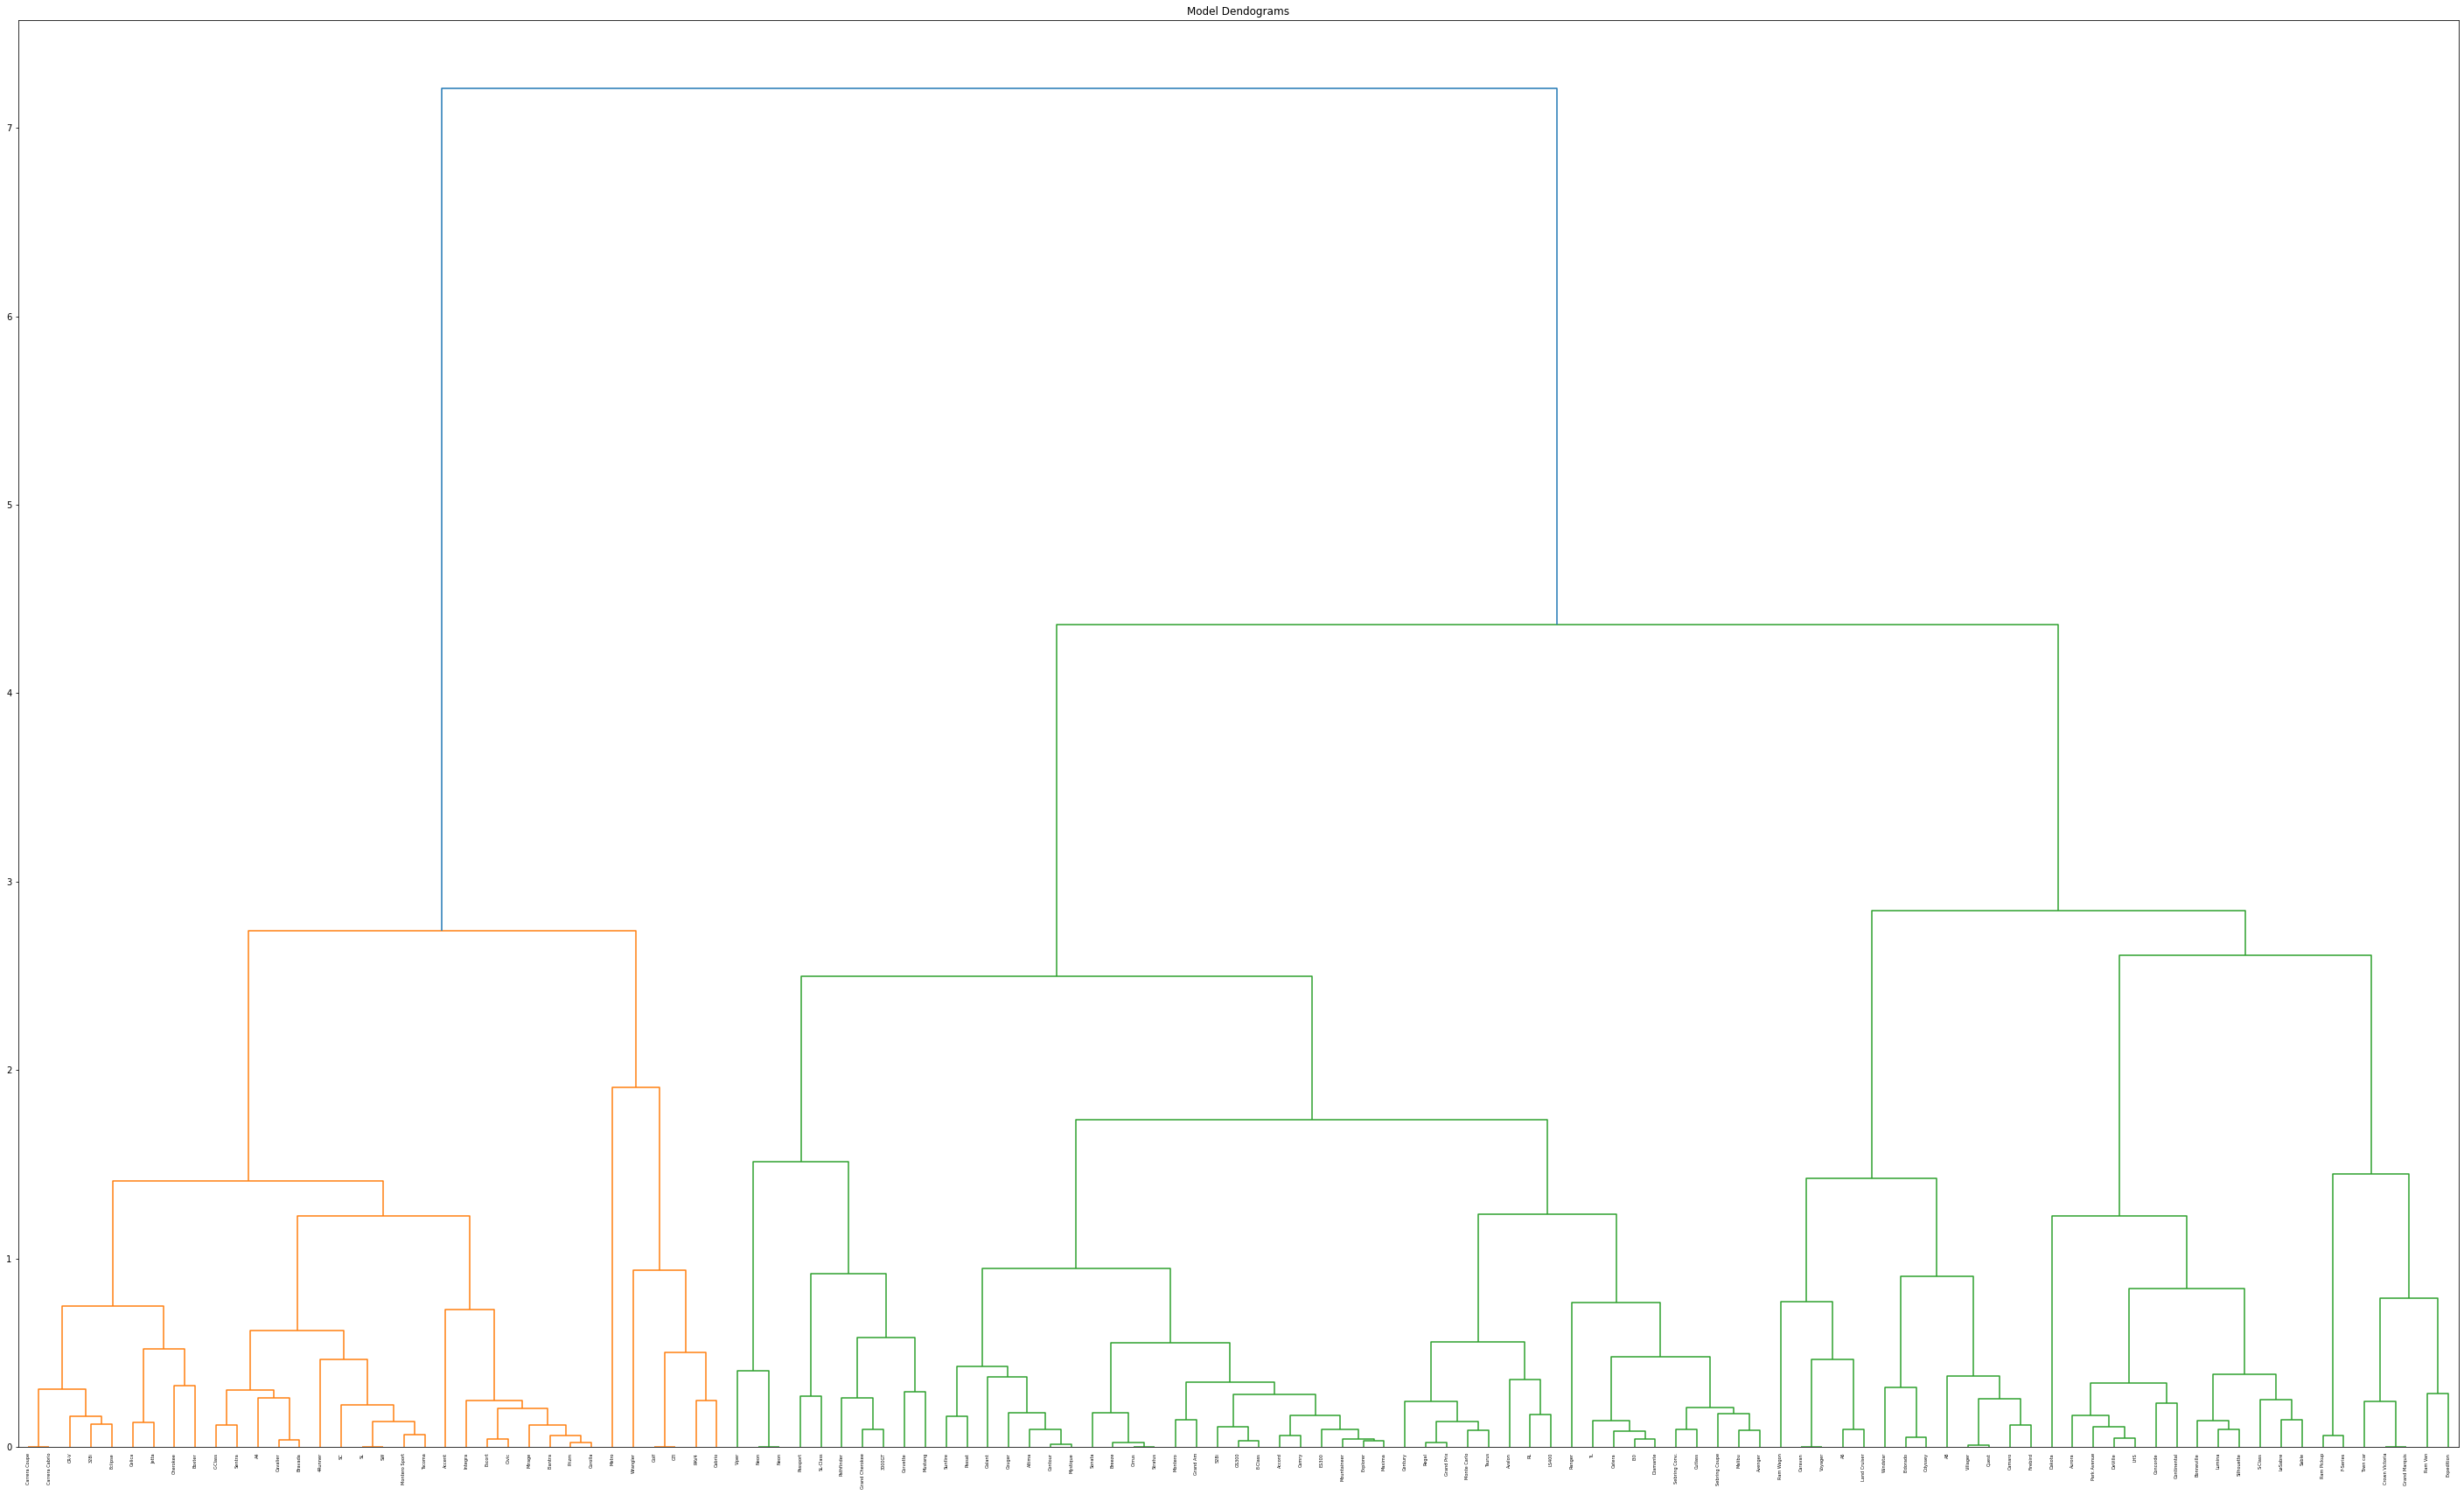

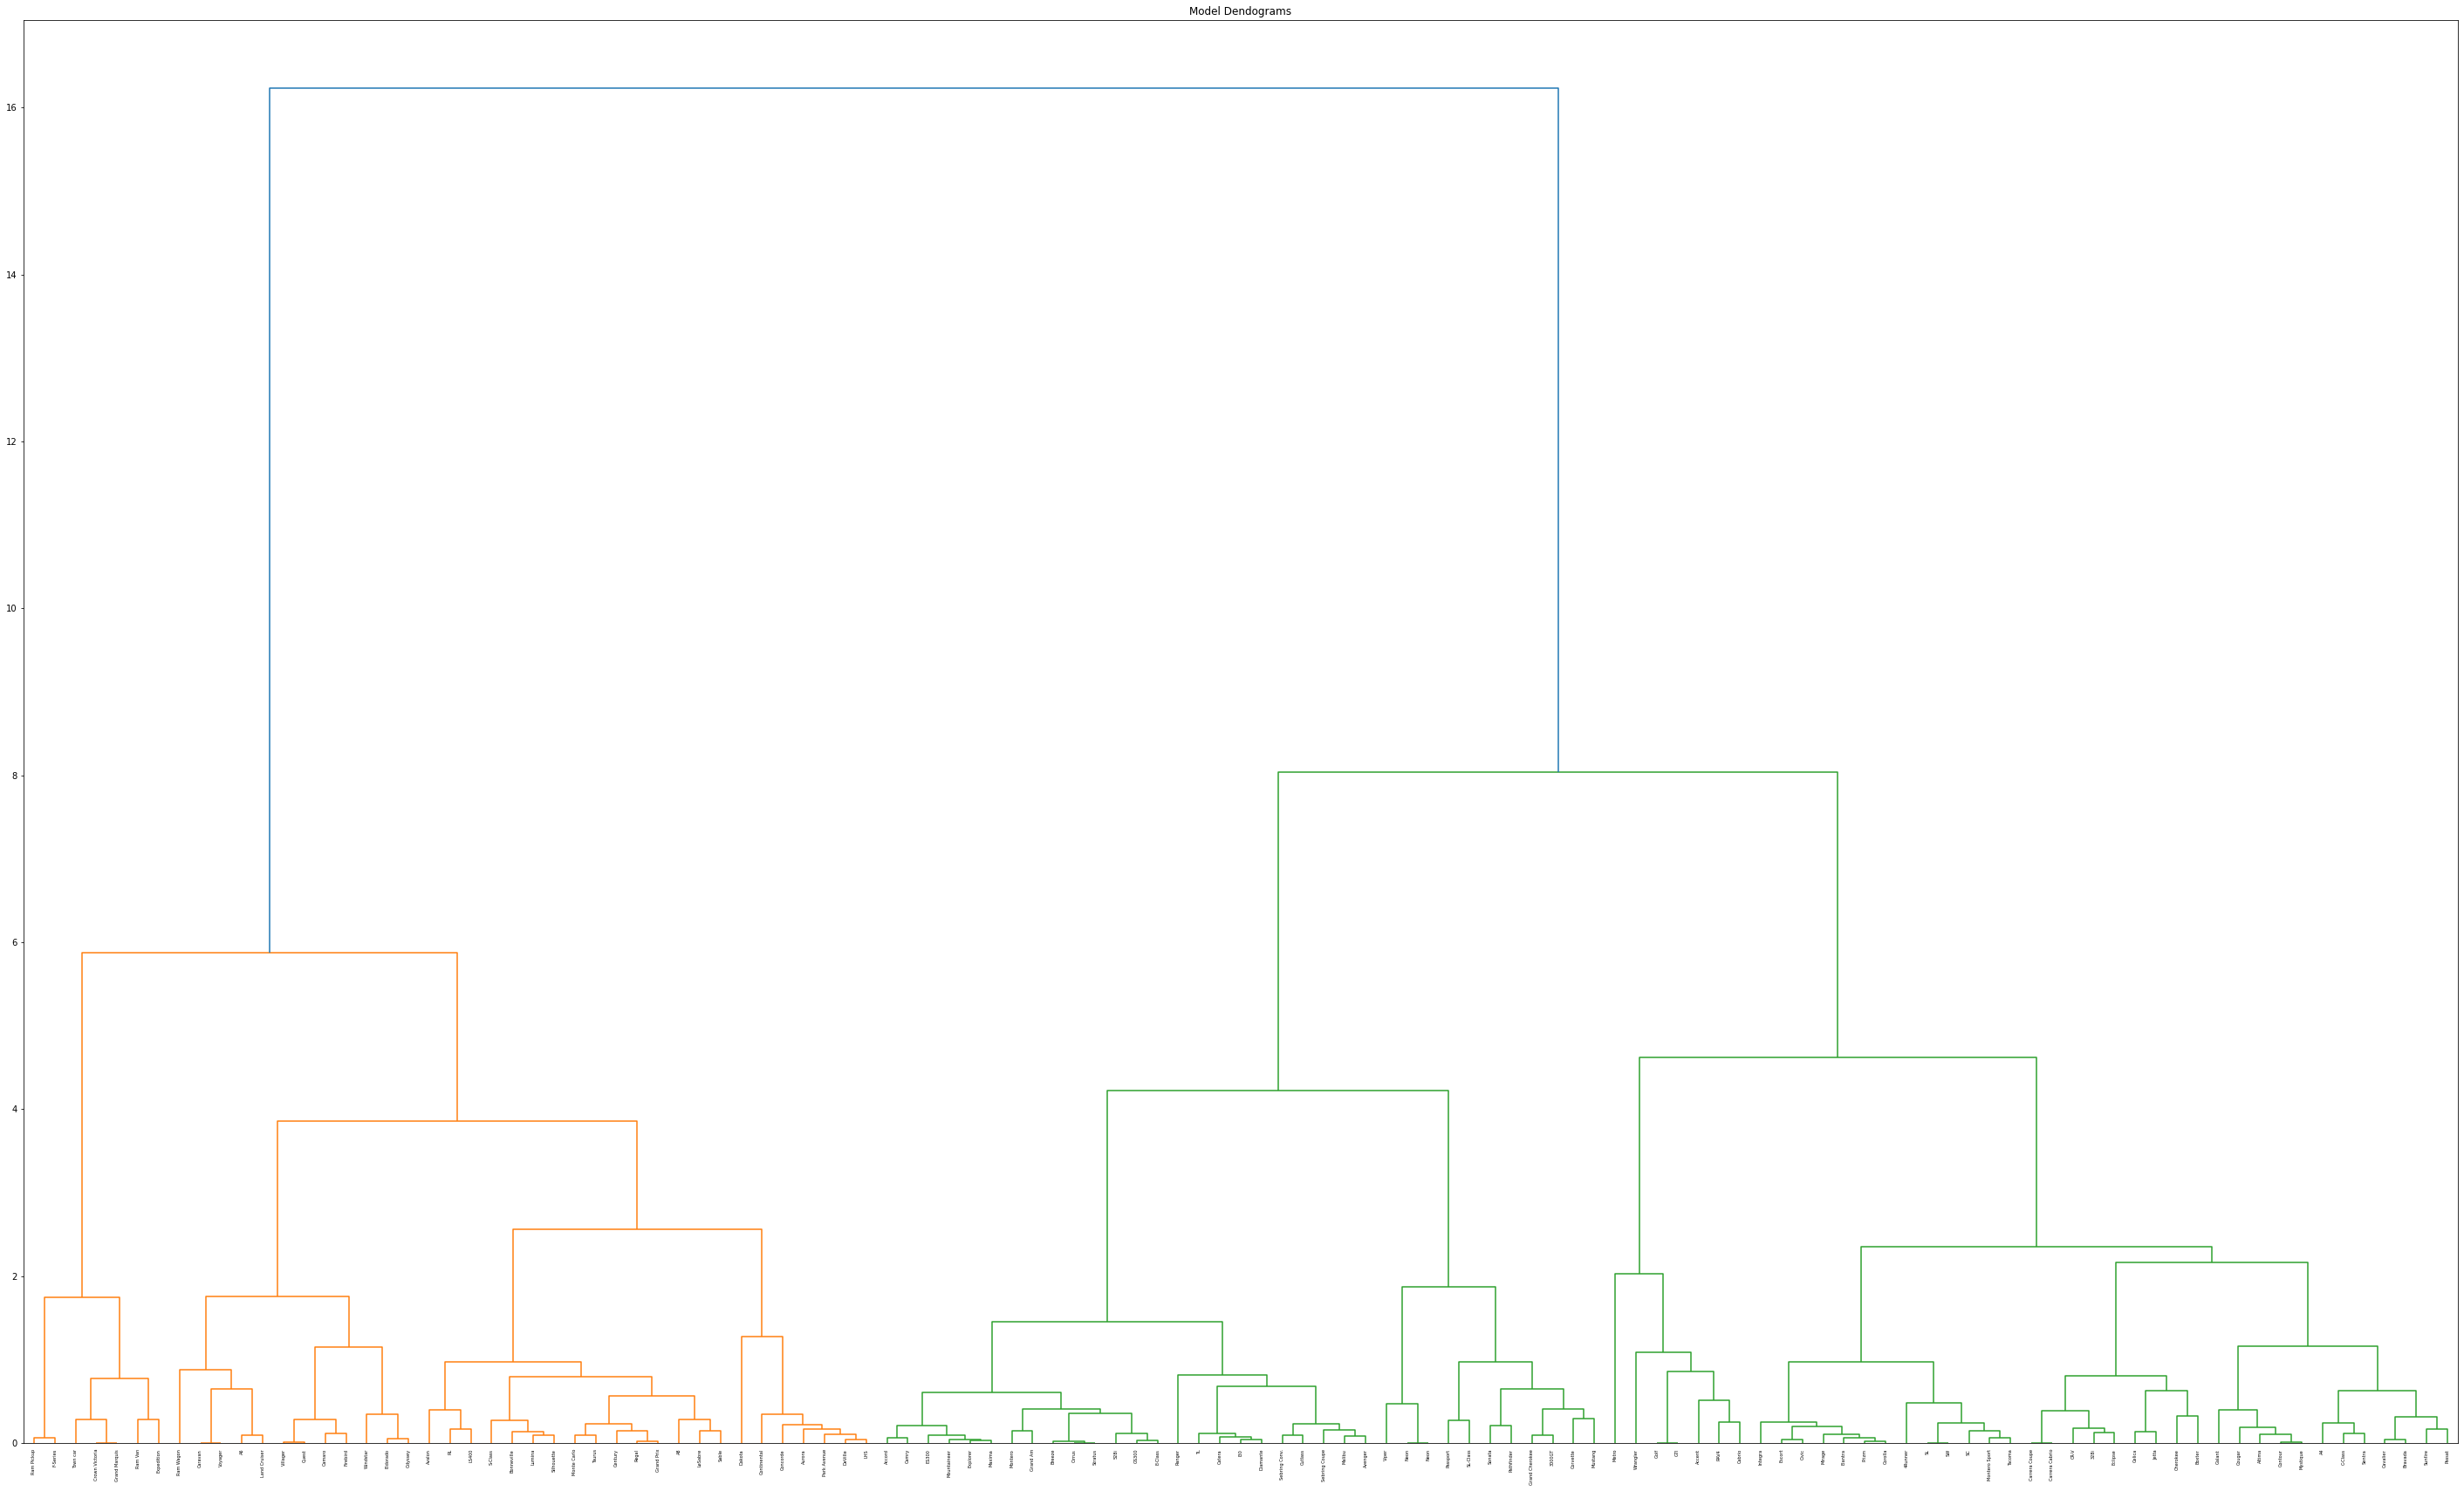

In [53]:
Linkage=['complete','ward']
for i in Linkage:

    plt.figure(figsize=(50, 30))
    plt.title("Model Dendograms")

    df.index= df_scaled['Model']

    shc.dendrogram(shc.linkage(df, method=i),labels=df.index,orientation= 'top')
    ax = plt.gca()
    ax.tick_params(axis='y', which='major', labelsize=10)

In [22]:
#END